<a href="https://colab.research.google.com/github/maiyehezkel/Data-science/blob/main/names_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from bs4 import BeautifulSoup
from google.colab import files
import pandas as pd
import requests
import csv

In [3]:

country=["african","akkadian","albanian","anglo_saxon","arabian","aramic","aremenian","arthurian_legend","assyrian","nahuatl","babylonian","basque","bulgarian","celtic","chamoru","chinese","cornish","croatian","czechoslovakian","denish","dutch","egtptian","english","esperanto","finish","french","gaelic","german","greek","hawaiian","hebrew","hindi","hungarian","icelandic","irish","italian","japanese","korean","latin","lithuania","native_american","norse","norwegian","persian","polish","portuguese","romanian","russian","scandinavian","scottish","serbian","slavic","slovene","spanish","swedish","swiss","teutonic","thai","turkish","ukrainian","vietnamese","welsh","yiddish"]
gender=["female","male"]

In [7]:
for i in range(len(country)):
    for j in range(len(gender)):
      url = "http://www.20000-names.com/"+gender[j]+"_"+country[i]+"_names.htm"
      result = requests.get(url)
      doc = BeautifulSoup(result.text, "html.parser")
      database = doc.find_all('li')
      fulldatabase1=[]
      fulldatabase2=[]
      for li in database:
        fulllist1=[]
        fulllist2=[]
        data=li.text
        dataClean= data.strip()
        dataClean2 = dataClean.replace("\r","").replace("\n","").replace("'","").replace(", or,","/").replace(":",",").replace(".",",")
        listofnm= dataClean2.rsplit(",")
        nameClean= listofnm[0].split(":",0)
        fullname= nameClean[0].split("(",1)
        onlyname= fullname[0]
        fulllist1.append(onlyname.strip())
        if(len(fullname)==2):
          originalname=fullname[1].replace(")","")
          fulllist2.append(onlyname.strip())
          fulllist2.append(originalname.strip())
          fulllist2.append(country[i])
          fulllist2.append(country[i])
          fulldatabase2.append(fulllist2)
        meaning=listofnm[1].split("meaning")
        if(len(meaning)>=2):
          fulllist1.append(meaning[1].strip().replace('"','').replace("     ",""))
        else:
          fulllist1.append(meaning[0].strip().replace('"','').replace("     ",""))
        fulllist1.append(gender[j])
        fulllist1.append(country[i])
        fulldatabase1.append(fulllist1)







In [8]:

results_df = pd.DataFrame(fulldatabase1, columns=['Name', 'Meaning', 'Gender', 'Location'])
results2_df = pd.DataFrame(fulldatabase2, columns=['Original Name', 'Name in other lang', 'Language', 'Location'])

In [9]:
results_df

,Name,Meaning,Gender,Location
0,AIZIK,Yiddish form of Hebrew Yitzchak,male,yiddish
1,ALTER,old; elder in Yiddish and the other in Latin,male,yiddish
2,ANSHEL,Yiddish pet form of Hebrew Asher,male,yiddish
3,ARKE,Yiddish form of Hebrew Aharown,male,yiddish
4,AVROM,Variant spelling of Yiddish Avrum,male,yiddish
...,...,...,...,...
68,ZELIG,Variant spelling of Yiddish Selig,male,yiddish
69,ZIK,Pet form of Yiddish Itzik,male,yiddish
70,ZINDEL,son,male,yiddish
71,ZUSMAN,Variant spelling of Yiddish Zusmann,male,yiddish


In [10]:
results2_df

,Original Name,Name in other lang,Language,Location
0,ALTER,אַלְתֵּר,yiddish,yiddish
1,ANSHEL,אַנְשֶׁעל,yiddish,yiddish
2,AVRUM,אַבְרוּם,yiddish,yiddish
3,BER,בֶּער,yiddish,yiddish
4,CHASKEL,חַאסְקֶעל,yiddish,yiddish
5,CHATZKEL,חַצְקֶעל,yiddish,yiddish
6,EIZIK,אַייזִיק,yiddish,yiddish
7,ELKAN,עֶלְקָן,yiddish,yiddish
8,ELYA,עֶלְיָא,yiddish,yiddish
9,ELYE,עֶלְיָא,yiddish,yiddish


In [12]:

results_df.to_csv('name_descriptions.csv')
files.download('name_descriptions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
results2_df.to_csv('languages_other_names.csv')
files.download('languages_other_names.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import networkx as nx

import pandas as p

G = nx.from_pandas_edgelist(results_df,'Meaning','Name', edge_attr=True)


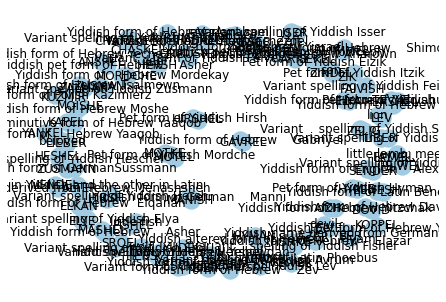

In [16]:
import matplotlib.pyplot as plt


pos=nx.spring_layout(G)
nx.draw(G,pos,node_color='#A0CBE2',edge_color='#BB0000',width=2,edge_cmap=plt.cm.Blues, with_labels=True)


